In [6]:
from pathlib import Path
import itertools

import seaborn as sns

import sys
import os

module_path = os.path.abspath(os.path.join('../')) 
sys.path.insert(0, module_path)

import pandas as pd
import katspace
import katspace.core
import katspace.data
import katspace.plot

import importlib
for mod in ["katspace.core", "katspace.data", "katspace.plot"]:
    importlib.reload(sys.modules[mod])

from katspace.core import space_types_pos, space_types_ext

import matplotlib.pyplot as plt

from katspace.core import DATA_DIR, DRIVE_DIR, SPACE_TYPES
DATA_DIR = Path(DRIVE_DIR, "Datasets/")

SPACE_TYPES = space_types_ext

In [4]:
non_fic_df = pd.read_excel(Path(DATA_DIR, "20240820_non_fic_master.xlsx"))
fic_df = pd.read_excel(Path(DATA_DIR, "20231216_1_gutenberg_master.xlsx"))

In [5]:
non_fic_df.loc[:, "category"] = "non_fiction"
sel = non_fic_df["genre_2"] == "Reiseberichte, Reiseerzählungen"
non_fic_df.loc[sel, "category"] = "travelogue"

fic_df.loc[:, "category"] = "fiction"

In [7]:
#ratio

non_fic_rt = katspace.plot.calculate_ratios(non_fic_df, suffix = "", insert_values = True) #.rename(columns = {space_type : space_type[:-6] for space_type in space_types})

non_fic_rt = non_fic_rt.loc[:, list(SPACE_TYPES) + ["category"] + ["title"]]

fic_rt = katspace.plot.calculate_ratios(fic_df, suffix = "", insert_values= True) #.rename(columns = {space_type : space_type[:-6] for space_type in space_types})
fic_rt = fic_rt.loc[:, list(SPACE_TYPES) + ["title"]]
fic_rt.loc[:, "category"] = "fiction"

df_list = []
for space_type, df in itertools.product(SPACE_TYPES, [non_fic_rt, fic_rt]):
    temp_df = df.loc[:,[space_type, "category", "title"]]
    temp_df.rename(columns = {space_type : "ratio"}, inplace = True)
    temp_df.loc[:, "space_type"] = space_type
    df_list.append(temp_df)

df = pd.concat(df_list)
df = df.reset_index()
df

,year,ratio,category,title,space_type
0,1895,0.027701,non_fiction,Aus der Rumpelkammer der Weltgeschichte,perceived_space
1,1911,0.111724,travelogue,Reiseführer Tenerife und die anderen Canarisch...,perceived_space
2,1924,0.076450,non_fiction,Geschichte einer Somnambüle in Weilheim an der...,perceived_space
3,1828,0.226706,non_fiction,Über das Universum,perceived_space
4,1917,0.173432,non_fiction,Briefe eines Soldaten,perceived_space
...,...,...,...,...,...
33679,1912,0.216544,fiction,Die Novellen um Claudia,all_space
33680,1919,0.220367,fiction,Vögelchen,all_space
33681,1922,0.328798,fiction,Amok: Novellen einer Leidenschaft,all_space
33682,1911,0.246780,fiction,Brennendes Geheimnis: Erzählung,all_space


In [9]:
sel = df["ratio"].isna() & (df["space_type"] == "all_space")
df.loc[sel, ["title", "space_type"]]

,title,space_type
28165,Vier Katzenerzählungen,all_space
28289,Das Testament des Königs,all_space
28385,Der Judenstaat,all_space
28433,Was heißt: sich im Denken orientieren?,all_space
28439,Nachricht von der Einrichtung seiner Vorlesung...,all_space
28441,Beantwortung der Frage: Was ist Aufklärung?,all_space
28823,Die Philosophie der Freiheit,all_space
29046,Die Hexe Drut,all_space
29112,Die Heimkehr,all_space
29645,Lebensansichten des Katers Murr,all_space


In [10]:
sel = df["ratio"].isna() 
df = df[~sel]

df.loc[sel, ["title", "space_type"]]

,title,space_type


In [11]:
len(df[sel].sort_values("title"))

/var/folders/yd/lp8syplj03d658531gh7ckfc0000gp/T/ipykernel_91321/2249022198.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[sel].sort_values("title"))


0

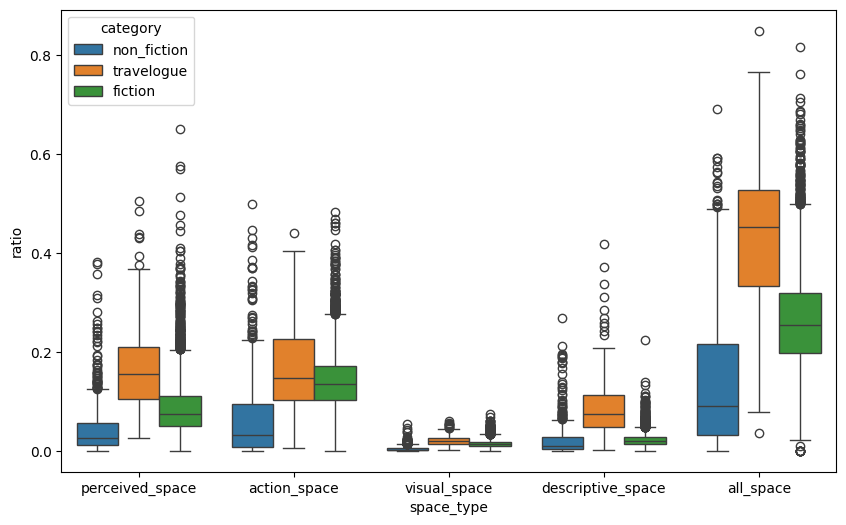

In [12]:
df_2 = df[~df["space_type"].isin(["no_space"])]
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_2, x="space_type", y="ratio", hue="category")

In [13]:
def prep_tukey_kramer(df): 
    
    genres = df["category"].unique()
    dic = { space_type: {} for space_type in ['perceived_space',
                                                'action_space',
                                                'visual_space',
                                                'descriptive_space',
                                                'all_space']} 
    space_types = dic.keys()
    for space_type, genre in itertools.product(space_types, genres):
        #positive = genre_df.loc[genre, space_type] 
        #negative = genre_df.loc[genre, "total"] - positive
        sel = (df["space_type"] == space_type) & (df["category"] == genre) 
        group_samples = list(df.loc[sel, "ratio"].values)
        dic[space_type][genre] = group_samples
    return dic 

In [14]:
df["category"].unique()

array(['non_fiction', 'travelogue', 'fiction'], dtype=object)

In [15]:
sel = (df["space_type"] == 'action_space') & (df["category"] == 'non_fiction')
df[sel]

,year,ratio,category,title,space_type
5614,1895,0.079224,non_fiction,Aus der Rumpelkammer der Weltgeschichte,action_space
5616,1924,0.088759,non_fiction,Geschichte einer Somnambüle in Weilheim an der...,action_space
5617,1828,0.024332,non_fiction,Über das Universum,action_space
5618,1917,0.053967,non_fiction,Briefe eines Soldaten,action_space
5620,1922,0.497826,non_fiction,Die Zerstörung Magdeburgs 1631,action_space
...,...,...,...,...,...
6436,1936,0.093446,non_fiction,Maya der indische Mythos,action_space
6437,1932,0.012862,non_fiction,Yoga und Buddhismus,action_space
6438,1843,0.178882,non_fiction,Geschichte des großen Bauernkriegs. Erster Band,action_space
6439,1843,0.268671,non_fiction,Geschichte des großen Bauernkriegs. Zweiter Band,action_space


In [16]:
df[df["ratio"].isna()]

,year,ratio,category,title,space_type


In [17]:
tukey_dict = prep_tukey_kramer(df)
tukey_dict

{'perceived_space': {'non_fiction': [0.027700831024930747,
   0.07644962747003563,
   0.22670623145400592,
   0.17343173431734318,
   0.03804347826086957,
   0.033713089979074636,
   0.052980132450331126,
   0.04013840830449827,
   0.025386524145829356,
   0.02878083661065427,
   0.02358974358974359,
   0.10968875502008033,
   0.004035512510088781,
   0.00568569479190357,
   0.019253731343283582,
   0.008570554025099479,
   0.008130081300813009,
   0.016938712657838004,
   0.04765056254136334,
   0.003355704697986577,
   0.042033727661716584,
   0.039950062421972535,
   0.05103789754332508,
   0.023539928486293205,
   0.052925672113863995,
   0.03556696305802548,
   0.06213292117465224,
   0.026641091219096334,
   0.007308160779537149,
   0.021859903381642513,
   0.018447837150127225,
   0.13766553741915613,
   0.14067278287461774,
   0.24024987337497888,
   0.015426997245179064,
   0.04186360567184335,
   0.06041666666666667,
   0.09966024915062288,
   0.3140425531914894,
   0.0353982

In [18]:
def tukey_kramer(dic, space_types):
    from scipy.stats import tukey_hsd
    res_dict = {}
    for space_type in space_types:
        groups = list(dic[space_type].values())
        res = tukey_hsd(*groups)
       # print("\n\n\n")
        #print(space_type)
        #print(res)
        res_dict[space_type] = res
    return res_dict


In [19]:
tukey_kramer(tukey_dict, ['perceived_space',
                                                'action_space',
                                                'visual_space',
                                                'descriptive_space',
                                                'all_space'])

{'perceived_space': <scipy.stats._hypotests.TukeyHSDResult at 0x135311ae0>,
 'action_space': <scipy.stats._hypotests.TukeyHSDResult at 0x135311de0>,
 'visual_space': <scipy.stats._hypotests.TukeyHSDResult at 0x133a0a0e0>,
 'descriptive_space': <scipy.stats._hypotests.TukeyHSDResult at 0x135356530>,
 'all_space': <scipy.stats._hypotests.TukeyHSDResult at 0x135355d50>}

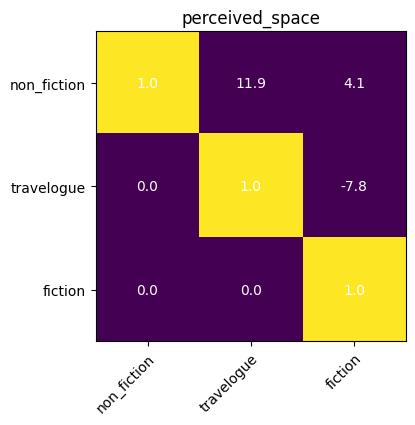

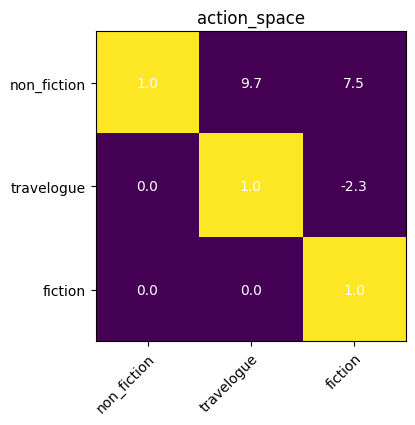

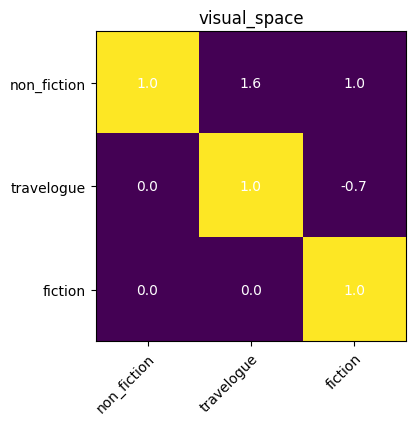

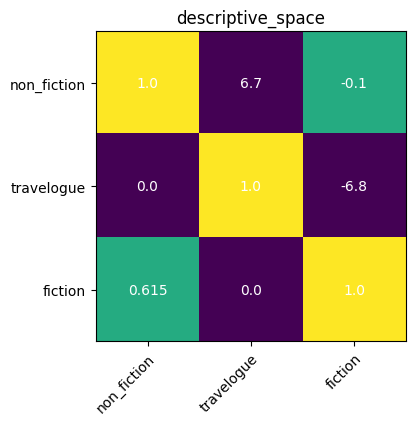

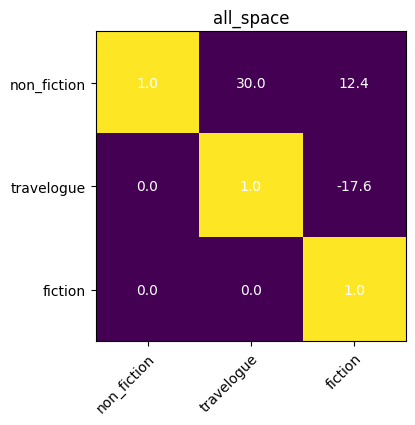

In [20]:
space_types_pos_ext = space_types_pos + ["all_space"]

res = tukey_kramer(tukey_dict, space_types_pos_ext)
genres = tukey_dict["action_space"].keys()

for space_type in space_types_pos_ext: 
    katspace.plot.plot_p_values_heatmap(res, genres, space_type)